# HW05 <font color=red>(제출기한-6월9일자정)</font>
- <font color=red> 지각제출 : 0점 </font>
---
Datascience 이해도 평가를 위한 문제입니다. 


> 작성방법 

- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 답안은 한 코드셀 내에 작성하며 여러줄로 작성해도 무방합니다.
- 출력결과가 미리 제시된 셀(<font color=red>'수정하지 마시오'</font>라고 표시된 셀)을 참고하여 코드를 작성하시오. 
- <font color=red>'수정하지 마시오'</font>라고 적힌 코드 셀은 절대로 지우면 안 됩니다.
- <font color=red> 불필요한 출력을 하는 코드</font>를 작성하면 0점 처리됩니다.
- Table에 관한 문제는 특별한 언급이 없을 경우 <font color=red> row와 column 순서가 출력 결과 예시와 동일</font>하게 합니다. 

> 제출방법

- ULMS HW5 제출란에 <font color=red>'HW05-학번.ipynb'</font>(본인학번)을 기한내 업로드합니다.
- <font color=red> 제출형식 오류 : 0점 <font>


In [1]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.random.seed(0)

fpath='https://raw.githubusercontent.com/data-8/textbook/878363106db4313de925a709b1617d6f328c56a1/assets/data/'

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


## 수업시간에 사용하였던 baby (신생아) 데이터를 이용합니다.

In [2]:
### 지우지 마시오.
baby = Table.read_table(fpath+'baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


### 문제1
임신일수(*Gestational Days*) 평균을 구하여 ``GD_mean``에 저장하시오. 

In [3]:
### 답안을 작성하시오.
GD_mean = baby.column(1).mean()

In [4]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
GD_mean

279.1013628620102

### 문제2
위 ``baby`` Table에서 200명의 산모들을 sampling하여 ``baby_sample``변수에 저장하시오.

- without replacement 시행을 할 것



In [5]:
### 답안을 작성하시오.
baby_sample = baby.sample(200, with_replacement=False)

In [6]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
baby_sample

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
98,275,25,65,112,True
108,291,39,65,135,False
129,275,24,65,135,False
116,292,20,65,118,False
111,281,27,64,112,False
131,282,21,66,126,False
110,292,35,62,127,False
118,293,21,63,103,False
112,278,21,63,120,False
110,321,28,66,180,False


### 문제3
위 ``baby_sample``을 10000번 Bootstrapping 하여 계산한 임신일수 평균값 결과 array를 `` bp_mean``이라는 변수에 저장하시오. 
- 수업시간에 배운 bootstrapping 방법을 그대로 사용할 것

In [7]:
### 답안을 작성하시오.
bp_mean = make_array()
for i in np.arange(10000):
    bootstrap_sample = baby_sample.sample()
    resampled_mean = bootstrap_sample.column(1).mean()
    bp_mean = np.append(bp_mean, resampled_mean)

In [8]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
bp_mean

array([278.005, 279.225, 278.2  , ..., 275.97 , 275.01 , 279.67 ])

### 문제4
위 ``bp_mean`` 배열로부터 90% 신뢰도를 갖는 평균값 구간을 추정하여 ``(left, right)`` 튜플에 저장하시오.

In [9]:
### 답안을 작성하시오.
left = percentile(5, bp_mean)
right = percentile(95, bp_mean)

In [10]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
(left, right)

(276.445, 279.795)

### 문제5
위에서 구한 ``bp_mean``에 대하여 histogram을 그리고, ``(left, right)``에 관한 노란색 선을 그리시오. 
- 수업시간 CH13에서 실습한 내용 그대로 그리기 옵션을 적용할 것
- histogram의 bins의 개수를 20개로 설정하여 실행할 것
- histogram을 그린 후 노란색 선을 그릴 것 


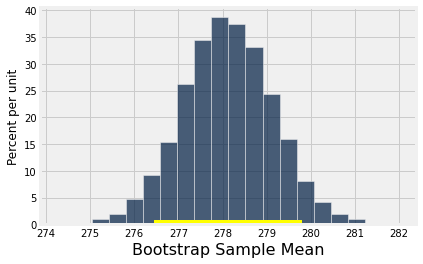

In [11]:
### 답안을 작성하시오. (그래프 그리기)
resampled_means = Table().with_column('Bootstrap Sample Mean', bp_mean)
resampled_means.hist(bins=20)
plots.plot(make_array(left,right), make_array(0,0), color='yellow', lw=10, zorder=1)

## 다음 문제6부터 문제10을 위해 가위바위보를 나타내는 Table 변수 ``rps``를 이용하자.

In [12]:
### 지우지 마시오.
rps = Table().with_column('RPS', ['Rock','Paper','Scissors'])
rps

RPS
Rock
Paper
Scissors


### 문제6
가위바위보를 랜덤하게 ``n``번 냈을 때 바위(``Rock``)을 낸 비율을 리턴하는 함수 ratio_rock를 작성하시오.

- 위 ``rps`` Table을 이용하여 sampling할 것

In [13]:
def ratio_rock(n):
### 답안을 작성하시오.
    return rps.sample(n).group('RPS').where('RPS', 'Rock').column('count')[0]/n


In [14]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
ratio_rock(100)

0.34

### 문제7
위 ``ratio_rock`` 함수를 이용하여 가위바위보를 랜덤하게 50번 냈을 때 바위(Rock)이 나오는 비율을 구하는 것을 10000번 반복 시행하여 그 값들을 ``ratio_50`` 배열 변수에 저장하시오. 

In [15]:
### 답안을 작성하시오.
ratio_50 = make_array()
for i in np.arange(10000):
    ratio_50 = np.append(ratio_50, ratio_rock(50))

In [16]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
ratio_50

array([0.2 , 0.32, 0.28, ..., 0.4 , 0.44, 0.34])

### 문제8
이번에는 위 ``ratio_rock`` 함수를 이용하여 랜덤하게 가위바위보를 200번 냈을 때 바위(Rock)가 나온 비율을 구하는 것을 10000번 시행하여 그 값들을 ``ratio_200`` 배열 변수에 저장하시오. 

In [17]:
### 답안을 작성하시오.
ratio_200 = make_array()
for i in np.arange(10000):
    ratio_200 = np.append(ratio_200, ratio_rock(200))

In [18]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
ratio_200

array([0.28 , 0.345, 0.305, ..., 0.33 , 0.32 , 0.385])

### 문제9
위 ``ratio_50``, ``ratio_200`` 배열을 column으로 지정하여 ``results``라는 Table을 생성하시오. 

- 각 column의 이름은 ``ratio_50``과 ``ratio_200``으로 할 것

In [19]:
### 답안을 작성하시오.
results = Table().with_columns('ratio_50', ratio_50, 'ratio_200', ratio_200)

In [20]:
### 다음과 같이 출력되어야 한다. (수정하지 마시오.)
results

ratio_50,ratio_200
0.2,0.28
0.32,0.345
0.28,0.305
0.36,0.33
0.26,0.405
0.34,0.305
0.36,0.33
0.32,0.33
0.4,0.395
0.38,0.38


### 문제10
위 ``results`` Table의 두 column을 중첩하여 histogram을 그리시오.

- histogram의 bins의 개수를 25개로 설정하여 실행할 것


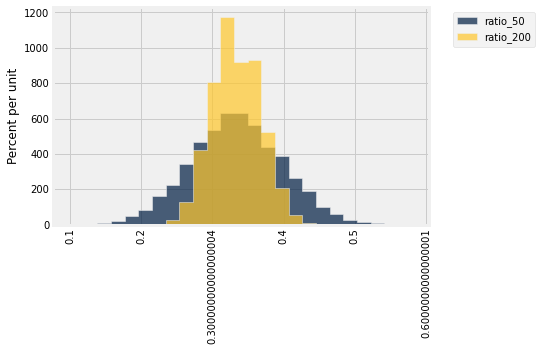

In [21]:
### 답안을 작성하시오. (그래프 그리기)
results.hist(bins=25)